In [15]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

c:\users\ghinarosa\appdata\local\programs\python\python38-32\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghinarosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import re, string, unicodedata  #modul regular expression
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,                                  
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ghinarosa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
stop_words = stopwords.words('indonesian')
stop_words.extend([ 'hii' , 'and' , 'ya' , 'yang' , 'mau' , 'yuk' , 'haii' , 'aja' , 'no' ,
'basa' , 'basi' , 'beby' , 'di', 'malam' , 'ini' , 'enak' , 'yukk' 
'full' , 'yah' , 'toto988' , 'bonus' , 'deposit' , 'harian' , 'sabung' ,
'ayam' , 'untuk' , 'boking' , 'morning' , 'hanya' , 'info' , 'wajib'
, 'dp' , 'rr' , 'fast' , 'respon' , 'mnt' , 'minta' , 'pilih' , 'lngsung' ,
'lanjut' , 'wa' , 'req' , 'sofia' , 'info' , 'lebih' , 'lanjut' , 'atau' ,
'bisa', 'langsung' , 'my' , 'inbox' , 'ig' , 'line' , 'bagi' , 'sudah' 
, 'done' , 'tranfer' , 'kirim' , 'niarriska_' , 'niar_riska' , 'niar_sari12' 
, 'msniarriska_' , 'ad' , 'bio' , 'setiap' , 'hari' , 'senin' , 'selasa' , 'jumat' ,
'minggu' , 'ak' , 'now' , 'yaa' ,'or' ,'jamin' , 'sini' , 'barang' , 'jockosrocket' , 
'zonawaria' , 'massas' , 'q' , 'yok' , 'yurayura' , 'uda' , 'cus' , 'kak' , 'mlm' ,
'modus' , 'hallo' ,'all' , 'lgsg' , 'lgi' , 'pagi' , 'ka' , 'yu' , 'isi' , 'skrg' , 'yg' , 
'bca' ,'rek' , 'via' , 'dulu' , 'oke' , 'sepi' , 'amat' ,'yak' , 'follow' , 'guys' , 'kalian' ,
'semua' , 'absen' , 'dong' , 'tetap' , 'gini' , 'beib' , 'bangett' , 'kuy' , 'semanagat' , 'selamat' ,
'k' , 'kmren' , 'lg' , 'nyanyi' , 'hajatan' , 'acara' , 'kelabu' ,
'lfllfllflfllffllflflflflflflflflfllflflflflflflflflflflflflflflflflflflflflflflflflflflflflfllflflflflflflflflfllflfllflflflflflflfllflflflflflllfl' , 
'yaudah' , 'biarin' , 'bahagia' , 'bogor' , 'banyalk' ,'banyak' , 'menang' , 'gak' ,'usah' , 'hai' , 
'notip' , 'niarriska' ,  'niar' , 'riska' , 'twr' ,' msniarriska' , 'aviliblenow' , 'jum' , 'at' , 
'accound' , 'in' , 'for' , 'a' , 'sayyy' , 'nih' , 'yura' , 'ribet' , 'daerah' , 'masuk' , 'mnit' ,
'dgnku' , 'lupa' , 'nikahan' , 'lfllflffllfllflflflfllffllflfllflflfllflflflfllffllflfflfllfllflfl' , 'lfl' , 
'likeforlikes' , 'likeforfollow' , 'fransiska' , 'terbesar' , 'komisi' , 'say' ,'yukk' , 'udah' , 'klo' , 'nggak', 'msniarriska'  ])

In [19]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [20]:
#import dataset
import pandas as pd

df = pd.read_excel(r'C:\Users\Ghinarosa\Desktop\GEMASTIK\availvcs-clean-hashtag.xlsx')

In [21]:
df.head(20)

,text
0,HII RATE AND RULES PERMANENT YA
1,Avail Vcs only trusted NO BASA BASI
2,Avail Vcs only trusted NO BASA BASI Langsung d...
3,Hii Yuk yang mau VCS BO ORDER VIDEO PRIBADI ba...
4,Avail Vcs only trusted NO BASA BASI Langsung d...
5,AVAIL VCS CS VIDIO SAY DI ORDER YA FAST RESPON...
6,AVAILIBLE VCS BEBY FAST RESPON WA 0821 6434 7231
7,Avail Vcs only trusted NO BASA BASI Langsung d...
8,Haii open dan Info tarif slot lanjut wa 082181...
9,Avail Vcs only trusted NO BASA BASI


In [22]:
#preprocessing
def removeStopword(str):
    stop_wordss = set(stop_words)
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_wordss]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    #remove email
    str = re.sub('\S*@\S*\s?', '', str) 
       
    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

In [1]:
#test the code
sentences = ["VCS 250k 1jam 200k 40mnt 150k 30mnt 083890700960 Minta RR Pilih tarif Transfer Lanjut wa Lngsung vcs"
]
for st in sentences:
    r = preprocessing(st)
    print(r)

NameError: name 'preprocessing' is not defined

In [24]:
#do preprocessing
import pandas as pd
import xlsxwriter
fo = pd.read_excel((r'C:\Users\Ghinarosa\Desktop\GEMASTIK\availvcs-clean-hashtag.xlsx')) #read excel file
txt = fo['text']
workbook = xlsxwriter.Workbook('availvcs-clean-hashtag-nih.xlsx')
worksheet = workbook.add_worksheet()
row = 0
col = 0
rowHeaders = ['text']
worksheet.write_row(row, col,  tuple(rowHeaders))
        
for t in txt:
    new_txt = preprocessing(t)
    rowValues = [new_txt]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))
    
workbook.close()


3 -4.724265330963906 0.6550420340910562
    Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0             1.0              0.9934   
1             1             2.0              0.9950   
2             2             2.0              0.9950   
3             3             0.0              0.5556   
4             4             2.0              0.9950   
5             5             2.0              0.9950   
6             6             2.0              0.9901   
7             7             2.0              0.9950   
8             8             0.0              0.6337   
9             9             2.0              0.9950   
10           10             2.0              0.9967   
11           11             2.0              0.9950   
12           12             0.0              0.9972   
13           13             1.0              0.9993   
14           14             0.0              0.9982   
15           15             0.0              0.9960   
16           16          

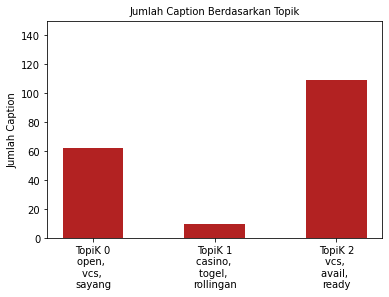

In [41]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
"rate rules permanent
avail vcs only trusted
avail vcs only trusted dm
vcs bo order video pribadi bareng dm pembayaran pulsa rekening
avail vcs only trusted dm
avail vcs cs vidio order
availible vcs
avail vcs only trusted dm
open tarif slot tipu tipu fake dijamin
avail vcs only trusted
vcs real avail vcs only trusted
avail vcs only trusted
open vcs trusted berbayar full face tarif dm
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya masukan kedepannya hubungi klik link daftar
avail slot terbatas include room sex slot tarif note lock slot
open bo jaksel include exclude room
avail vcs cs vidio order
vcs tarif transfer vcs fullface fullbody desah costum fullbody desah
open vcs dm chat
avail vcs cs vidio order
open slot sayang melayani vcs melayani open video pribadi bukti video dm
avail vcs cs vidio order
avail vcs cs vidio order bantu retweet sayang
availible vcs
avail vcs cs vidio order
open vcs bo sukabumi open
avail vcs cs vidio order
avail vcs only trusted
slot vcs sayang berbayar
availible vcs
avail vcs cs vidio order
availible vcs
availible vcs
avail vcs cs vidio order
ready minat vcs bo st lt
availible vcs
availible vcs
avail vcs cs vidio order
avail vcs cs vidio order
open kudus vcs
vcs video pribadi melayani vcs melayani open video pribadi privasi aman tarif dm
open vcs
video call sex tarif layanan chat nomor i
open vcs
more rem cosplay frame shoutout send the following photo s character series character quote
ready vcs berbayar butuh serius cek
om om tampan order
open vcs nya sayang bareng crot deh open video ready tarif dm hot
open vcs om om
open vcs nya sayang open video ready tarif dm hot
order
crott ready vcs
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi
dm
mikir puasin
open bo area bungurasih timur includ waria
ready vcs skrng bo minat bs dm
minat bo longtime shorttime bookingme tunggu dm
open vcs dm chat
ready vcs berbayar dijamin squirt
open vcs sayang puas sayang minat chat
ready vcs berbayar dijamin squirt
ready vcs berbayar dijamin squirt
thank you join vcs ready tarif transfer vcs
open vcs bo malang vcs bo
ready vcs berbayar dijamin squirt
open vcs dm chat
open open vcs vcs real minat rrdm
open vcs dm chat
ready vcs berbayar dijamin squirt
open vcs dm chat
ready vcs bertarif perjam bo fullbody fullface
open vcs dm chat
minat vcs skrng berbayar
vcs tarif transfer vcs
ready vcs video minat
open vcs dm chat
open bo yaaa marii cust tersayang ready vcs vcs
vcs tarif transfer vcs
vcs tarif transfer vcs
avail vcs sayang slot terbatas tarif dm me
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi
order vcs privasi terjaga tipu tipu php
open vcs berbayar real
avail vcs liat squirt slot berbayar
big body women
vcs basabasi order bo member
vcs basabasi order bo member
open vcs berbayar real
ready slot vcs bo bertarif
open vcs berbayar vcs gk melayani
merapat sayang
open vcs berbayar minat lsg amoy ola
open bo bekasi
open vcs berbayar real
avail vcs minat real vc
ready vcs chat me tester
open bo bekasi
ready real tipu tipu cuss dm
ready
available vcs fullbody fullface ready minat dm khusus serius
available vcs fullbody fullface price list khusus komitmen
available vcs fullbody fullface price list minat dm
open bo bekasi
avali vcs ready tarif jam free vidio bugil minat
ramaikan sayang
open vcs
puasa gakuat tahan godaan ramaikan sayang
ready top bottom
open vcs full face full body colmek squirt
vcs dm
vcs dm
vcs dm
bosan dm ramaikan sayang
ready vcs sampe squirt php
puasa ramaikan sayang
ramaikan sayang
open vcs berbaya jam
dm ramaikan sayang
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
available i jakarta barat kalideres tslover
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
bercinta whatsapp berminat dm vcs vc
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
ayooo lepas gairah gabung vcs bersamaku dm
avail vcs ready tarifnya jam
order vcs trusted akun fake
menggila order vcs trusted akun fake
sore enaknya ngopi
ikan hiu makan awkarin
avail vcs ready tarifnya jam testi
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam testi
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
avail vcs ready tarifnya jam
vcsbugil berbayar minat tlp
avail vcs ready tarifnya jam
open vcs real tes detik dm
open vcs more
open vcs real tes detik
avail vcs berbayar minat hubungi whatsapp twitter
avail vcs berbayar minat hubungi whatsapp twitter
besok valentine days
open sayang berbayar uang dm
open vcs berbayar full body minat
kunjungi vcs real
suka polos kasar
kunjungi vcs real
kunjungi vcs real
stadion persija
kunjungi vcs real
kunjungi vcs real
kunjungi vcs real
open vcs berbayar menit menit menit open member full face full body pulsa
real account open member vcs atm pulsa melayani transfer
"



""".split("\n")[1:-1]


stopword = [ ]
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(3, 4):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(40))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots()

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'TopiK ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Caption Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Caption')
ax1.set_ylim(0, 150)



plt.show()


In [42]:
print(ldamodel.print_topics())

[(0, '0.169*"open" + 0.143*"vcs" + 0.057*"sayang" + 0.036*"chat" + 0.033*"berbayar" + 0.032*"video" + 0.028*"real" + 0.028*"tarif" + 0.025*"slot" + 0.021*"ramaikan"'), (1, '0.064*"casino" + 0.064*"togel" + 0.064*"rollingan" + 0.042*"full" + 0.040*"aman" + 0.032*"slot" + 0.032*"diskon" + 0.032*"game" + 0.032*"minimal" + 0.032*"cashback"'), (2, '0.223*"vcs" + 0.110*"avail" + 0.104*"ready" + 0.067*"jam" + 0.063*"tarifnya" + 0.039*"order" + 0.024*"vidio" + 0.024*"berbayar" + 0.024*"minat" + 0.020*"trusted"')]


In [94]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [97]:
#MASIH ADA BEBERAPA YANG BLM BERSIH

fo = pd.ExcelFile('availvcs-clean3.xlsx') #read the data
df = pd.read_excel(fo) #create data frame
text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

304
[['rate', 'rules', 'permanent', 'availbo', 'availvcs', 'availjaksel', 'jakartaselatan', 'cewekbooking', 'wanitaidaman', 'vcsreal', 'boreal', 'openbo', 'openvcs'], ['avail', 'vcs', 'only', 'trusted', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['avail', 'vcs', 'only', 'trusted', 'dm', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['vcs', 'bo', 'order', 'video', 'pribadi', 'bareng', 'dm', 'pembayaran', 'pulsa', 'rekening', 'openbo', 'openvcs', 'vcsreal', 'availbo', 'availjaksel', 'availvcs'], ['avail', 'vcs', 'only', 'trusted', 'dm', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['avail', 'vcs', 'cs', 'vidio', 'order', 

In [98]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [99]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(271 unique tokens: ['availbo', 'amovcs', 'available', 'available_availindonesia', 'availbali']...)


In [100]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

304
[(2, 1), (20, 1), (25, 1), (48, 1), (71, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (84, 1), (85, 1), (86, 1), (87, 1), (89, 2), (90, 1), (91, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (100, 1), (102, 1), (103, 1), (104, 1), (117, 1)]


In [101]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

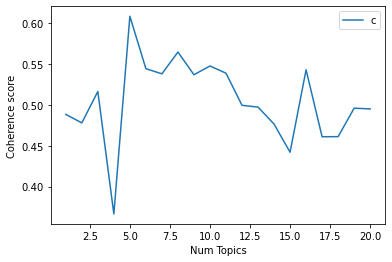

In [102]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [103]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.488308
Num Topics = 2  has Coherence Value of 0.477908
Num Topics = 3  has Coherence Value of 0.516335
Num Topics = 4  has Coherence Value of 0.366442
Num Topics = 5  has Coherence Value of 0.608494
Num Topics = 6  has Coherence Value of 0.544306
Num Topics = 7  has Coherence Value of 0.537978
Num Topics = 8  has Coherence Value of 0.564637
Num Topics = 9  has Coherence Value of 0.536896
Num Topics = 10  has Coherence Value of 0.547558
Num Topics = 11  has Coherence Value of 0.538769
Num Topics = 12  has Coherence Value of 0.499439
Num Topics = 13  has Coherence Value of 0.497216
Num Topics = 14  has Coherence Value of 0.47649
Num Topics = 15  has Coherence Value of 0.441989
Num Topics = 16  has Coherence Value of 0.542905
Num Topics = 17  has Coherence Value of 0.460905
Num Topics = 18  has Coherence Value of 0.461078
Num Topics = 19  has Coherence Value of 0.495877
Num Topics = 20  has Coherence Value of 0.495035


In [104]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.029*"wariatetegede_wariabogor" + 0.020*"shemalebogor" + 0.020*"wariabogor" + 0.015*"availbekasi_availdepok" + 0.015*"openbojakarta_openbobandung" + 0.015*"wariavip" + 0.015*"wariacikarang_wariaciputat" + 0.015*"shemalebogor_wariacibinong" + 0.015*"wariabokinganjakarta_wariabintaro" + 0.015*"wariabokinganjakarta_wariabintaro_wariacikarang_wariaciputat"
Topic: 1 Word: 0.023*"bo" + 0.018*"vcscrot" + 0.017*"openvcsline" + 0.016*"dm" + 0.015*"realbo" + 0.013*"bispak" + 0.012*"openvcsreal_bojogja" + 0.012*"availbo" + 0.012*"vcscoli_vcsbugil" + 0.012*"vcskontol"
Topic: 2 Word: 0.031*"jam_vcscolmek" + 0.025*"openvcsreal_bojogja" + 0.025*"vcscoli_vcsbugil" + 0.022*"vcscrot" + 0.016*"jam" + 0.016*"ready_tarifnya_jam_vcscolmek" + 0.015*"tarifnya" + 0.015*"ready_tarifnya" + 0.015*"vcsasli" + 0.015*"vcscoli"
Topic: 3 Word: 0.022*"openbojakarta_openbobandung" + 0.020*"vcscrot" + 0.018*"openvcsreal_bojogja" + 0.018*"vcscoli_vcsbugil" + 0.017*"openvcsreal_open_availbandung_availjaksel

In [105]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_word-availvcs3.csv")
print(df)

None


In [106]:
top_words_per_topic

[(0, 'wariatetegede_wariabogor', 0.028522782),
 (0, 'shemalebogor', 0.020318767),
 (0, 'wariabogor', 0.020283496),
 (0, 'availbekasi_availdepok', 0.0154989185),
 (0, 'openbojakarta_openbobandung', 0.015383191),
 (0, 'wariavip', 0.0146155525),
 (0, 'wariacikarang_wariaciputat', 0.014598642),
 (0, 'shemalebogor_wariacibinong', 0.014596779),
 (0, 'wariabokinganjakarta_wariabintaro', 0.014595791),
 (0,
  'wariabokinganjakarta_wariabintaro_wariacikarang_wariaciputat',
  0.014594559),
 (1, 'bo', 0.02269871),
 (1, 'vcscrot', 0.018070558),
 (1, 'openvcsline', 0.016747843),
 (1, 'dm', 0.015723426),
 (1, 'realbo', 0.014980674),
 (1, 'bispak', 0.0133499),
 (1, 'openvcsreal_bojogja', 0.011984088),
 (1, 'availbo', 0.01194996),
 (1, 'vcscoli_vcsbugil', 0.011788104),
 (1, 'vcskontol', 0.011732874),
 (2, 'jam_vcscolmek', 0.03081079),
 (2, 'openvcsreal_bojogja', 0.025154362),
 (2, 'vcscoli_vcsbugil', 0.024802513),
 (2, 'vcscrot', 0.021758826),
 (2, 'jam', 0.015868424),
 (2, 'ready_tarifnya_jam_vcscolme

In [107]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim2.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.114603 -0.056458       1        1  27.791213
0     -0.089933  0.062552       2        1  22.054039
3      0.038035  0.034832       3        1  21.091568
2      0.113032  0.000314       4        1  18.457899
1      0.053469 -0.041241       5        1  10.605280, topic_info=                            Term       Freq      Total Category  logprob  \
230                jam_vcscolmek   9.000000   9.000000  Default  30.0000   
236             vcscoli_vcsbugil  10.000000  10.000000  Default  29.0000   
155     wariatetegede_wariabogor  10.000000  10.000000  Default  28.0000   
231          openvcsreal_bojogja  11.000000  11.000000  Default  27.0000   
21                            bo   6.000000   6.000000  Default  26.0000   
..                           ...        ...        ...      ...      ...   
183                          jam   0.804626   5

IndexError: list index out of range

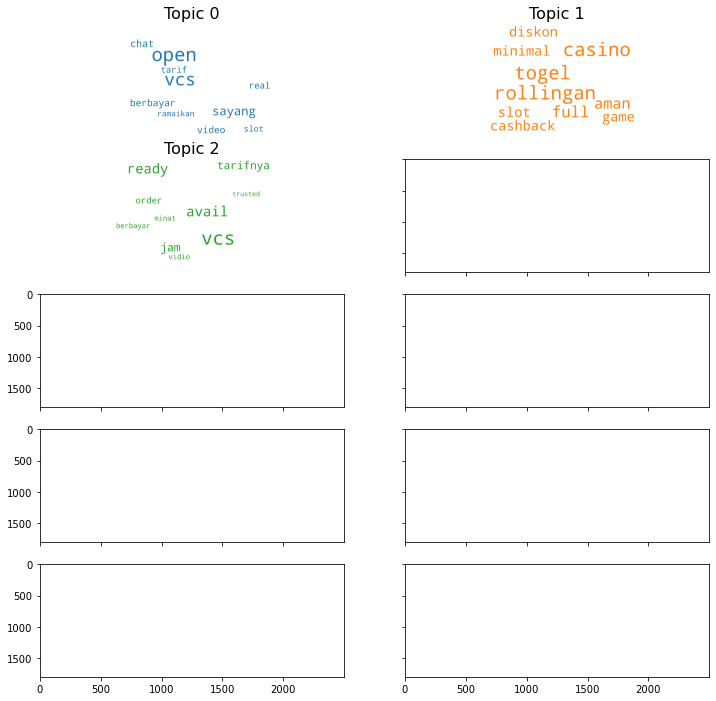

In [46]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()